In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cashrequest_df =pd.read_csv('./project_dataset/extract - cash request - data analyst.csv')
fees_df  =pd.read_csv('./project_dataset/extract - fees - data analyst - .csv')

In [3]:
import pandas as pd

# Paso 1: Crear la columna 'account_status' en cashrequest_df
cashrequest_df['account_status'] = cashrequest_df['user_id'].apply(
    lambda x: 'active' if pd.notna(x) else 'inactive'
)

# Verificar que la columna 'account_status' ha sido creada correctamente
print(cashrequest_df[['user_id', 'account_status']].head())

# Paso 2: Realizar la fusión entre 'cashrequest_df' y 'fees_df' usando 'id' y 'cash_request_id'
merged_df = pd.merge(cashrequest_df, fees_df, left_on='id', right_on='cash_request_id', how='left')

# Paso 3: Verificar si la columna 'account_status' está presente en merged_df
print(merged_df[['user_id', 'account_status', 'cash_request_id']].head())


   user_id account_status
0    804.0         active
1    231.0         active
2    191.0         active
3    761.0         active
4   7686.0         active
   user_id account_status  cash_request_id
0    804.0         active              NaN
1    231.0         active              NaN
2    191.0         active              NaN
3    761.0         active              NaN
4   7686.0         active              NaN


In [4]:
# Verificar el estado de algunas filas
print(merged_df[['user_id', 'deleted_account_id', 'account_status']].head())



   user_id  deleted_account_id account_status
0    804.0                 NaN         active
1    231.0                 NaN         active
2    191.0                 NaN         active
3    761.0                 NaN         active
4   7686.0                 NaN         active


In [5]:
active_users_df = merged_df[merged_df['account_status'] == 'active']
inactive_users_df = merged_df[merged_df['account_status'] == 'inactive']


In [6]:
print(merged_df.columns)  # Ver las columnas del merged_df
print(merged_df.head())    # Ver las primeras filas para asegurarnos de que los datos son correctos


Index(['id_x', 'amount', 'status_x', 'created_at_x', 'updated_at_x', 'user_id',
       'moderated_at', 'deleted_account_id', 'reimbursement_date',
       'cash_request_received_date', 'money_back_date', 'transfer_type',
       'send_at', 'recovery_status', 'reco_creation', 'reco_last_update',
       'account_status', 'id_y', 'cash_request_id', 'type', 'status_y',
       'category', 'total_amount', 'reason', 'created_at_y', 'updated_at_y',
       'paid_at', 'from_date', 'to_date', 'charge_moment'],
      dtype='object')
   id_x  amount  status_x                   created_at_x  \
0     5   100.0  rejected  2019-12-10 19:05:21.596873+00   
1    70   100.0  rejected   2019-12-10 19:50:12.34778+00   
2     7   100.0  rejected   2019-12-10 19:13:35.82546+00   
3    10    99.0  rejected  2019-12-10 19:16:10.880172+00   
4  1594   100.0  rejected  2020-05-06 09:59:38.877376+00   

                    updated_at_x  user_id                   moderated_at  \
0   2019-12-11 16:47:42.40783+00    80

In [7]:
# Verificar valores nulos en las columnas clave
print(merged_df[['user_id', 'account_status', 'amount', 'cash_request_id']].isnull().sum())


user_id             2572
account_status         0
amount                 0
cash_request_id    11037
dtype: int64


In [8]:
total_amount_active = active_users_df['amount'].sum()
total_amount_inactive = inactive_users_df['amount'].sum()

print(f"Total amount requested by active users: {total_amount_active}")
print(f"Total amount requested by inactive users: {total_amount_inactive}")


Total amount requested by active users: 2464647.0
Total amount requested by inactive users: 215732.0


In [9]:
# Número de solicitudes por usuario
requests_per_user = merged_df.groupby('user_id').size().reset_index(name='num_requests')

# Total de dinero solicitado por usuario
total_per_user = merged_df.groupby('user_id')['amount'].sum().reset_index(name='total_requested')

# Unir estos resultados al merged_df
merged_df = merged_df.merge(requests_per_user, on='user_id', how='left')
merged_df = merged_df.merge(total_per_user, on='user_id', how='left')

print(merged_df.head())


   id_x  amount  status_x                   created_at_x  \
0     5   100.0  rejected  2019-12-10 19:05:21.596873+00   
1    70   100.0  rejected   2019-12-10 19:50:12.34778+00   
2     7   100.0  rejected   2019-12-10 19:13:35.82546+00   
3    10    99.0  rejected  2019-12-10 19:16:10.880172+00   
4  1594   100.0  rejected  2020-05-06 09:59:38.877376+00   

                    updated_at_x  user_id                   moderated_at  \
0   2019-12-11 16:47:42.40783+00    804.0  2019-12-11 16:47:42.405646+00   
1  2019-12-11 14:24:22.900054+00    231.0  2019-12-11 14:24:22.897988+00   
2  2019-12-11 09:46:59.779773+00    191.0  2019-12-11 09:46:59.777728+00   
3  2019-12-18 14:26:18.136163+00    761.0  2019-12-18 14:26:18.128407+00   
4   2020-05-07 09:21:55.34008+00   7686.0  2020-05-07 09:21:55.320193+00   

   deleted_account_id             reimbursement_date  \
0                 NaN  2020-01-09 19:05:21.596363+00   
1                 NaN   2020-01-09 19:50:12.34778+00   
2             

In [10]:
# Eliminamos filas con valores nulos en las columnas clave
merged_df = merged_df.dropna(subset=['amount', 'account_status'])

# Verificamos los nulos restantes
print(merged_df.isnull().sum())


id_x                              0
amount                            0
status_x                          0
created_at_x                      0
updated_at_x                      0
user_id                        2572
moderated_at                  10335
deleted_account_id            29521
reimbursement_date                0
cash_request_received_date     7945
money_back_date                8177
transfer_type                     0
send_at                        9416
recovery_status               24894
reco_creation                 24894
reco_last_update              24894
account_status                    0
id_y                          11037
cash_request_id               11037
type                          11037
status_y                      11037
category                      29898
total_amount                  11037
reason                        11037
created_at_y                  11037
updated_at_y                  11037
paid_at                       16563
from_date                   

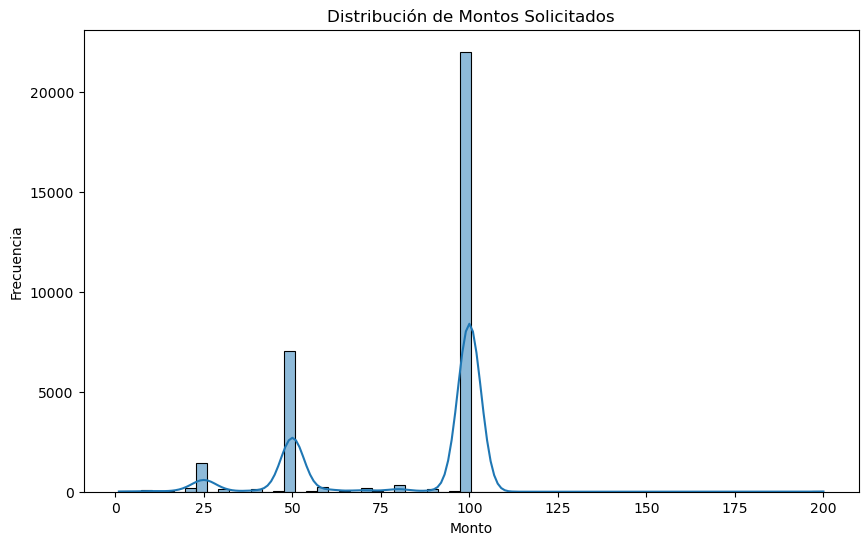

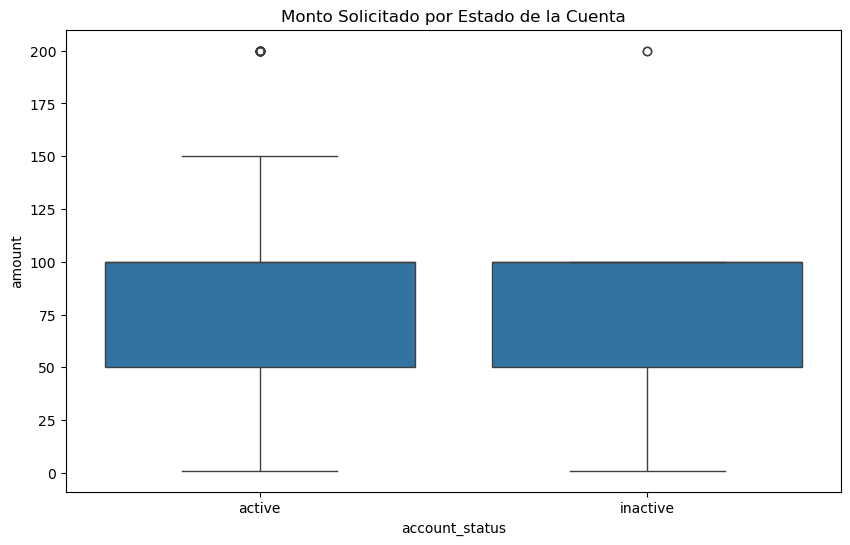

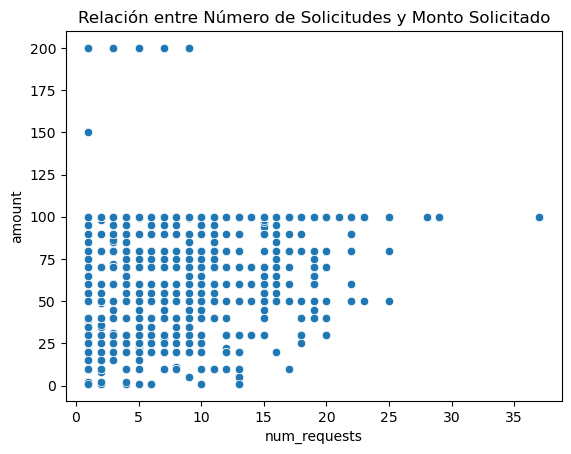

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de los montos solicitados
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['amount'], kde=True)
plt.title('Distribución de Montos Solicitados')
plt.xlabel('Monto')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot de amount por account_status
plt.figure(figsize=(10, 6))
sns.boxplot(x='account_status', y='amount', data=merged_df)
plt.title('Monto Solicitado por Estado de la Cuenta')
plt.show()

# Correlación entre cantidad solicitada y número de solicitudes por usuario
sns.scatterplot(x='num_requests', y='amount', data=merged_df)
plt.title('Relación entre Número de Solicitudes y Monto Solicitado')
plt.show()


In [12]:
# Contar la cantidad de cuentas activas e inactivas
account_status_counts = merged_df['account_status'].value_counts()

# Mostrar el resultado
print(account_status_counts)


account_status
active      29522
inactive     2572
Name: count, dtype: int64


In [13]:
# Promedio de montos solicitados por cuentas activas e inactivas
average_amount_by_status = merged_df.groupby('account_status')['amount'].mean()

# Mostrar el resultado
print(average_amount_by_status)


account_status
active      83.485096
inactive    83.877138
Name: amount, dtype: float64


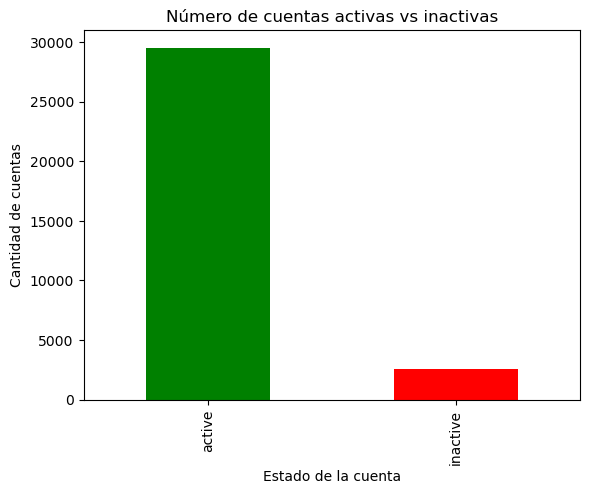

In [14]:
import matplotlib.pyplot as plt

# Gráfico de barras de cuentas activas vs. inactivas
account_status_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Número de cuentas activas vs inactivas')
plt.xlabel('Estado de la cuenta')
plt.ylabel('Cantidad de cuentas')
plt.show()


In [15]:
# Filtramos las cuentas activas e inactivas basándonos en user_id (activo) y deleted_account_id (inactivo)
active_df = merged_df[merged_df['user_id'].notnull()]
inactive_df = merged_df[merged_df['deleted_account_id'].notnull()]

# Verificamos si hay datos nulos
print(f'Cuentas activas: {active_df.shape[0]} registros')
print(f'Cuentas inactivas: {inactive_df.shape[0]} registros')

# Verificamos las columnas que tenemos
print(active_df.columns)
print(inactive_df.columns)


Cuentas activas: 29522 registros
Cuentas inactivas: 2573 registros
Index(['id_x', 'amount', 'status_x', 'created_at_x', 'updated_at_x', 'user_id',
       'moderated_at', 'deleted_account_id', 'reimbursement_date',
       'cash_request_received_date', 'money_back_date', 'transfer_type',
       'send_at', 'recovery_status', 'reco_creation', 'reco_last_update',
       'account_status', 'id_y', 'cash_request_id', 'type', 'status_y',
       'category', 'total_amount', 'reason', 'created_at_y', 'updated_at_y',
       'paid_at', 'from_date', 'to_date', 'charge_moment', 'num_requests',
       'total_requested'],
      dtype='object')
Index(['id_x', 'amount', 'status_x', 'created_at_x', 'updated_at_x', 'user_id',
       'moderated_at', 'deleted_account_id', 'reimbursement_date',
       'cash_request_received_date', 'money_back_date', 'transfer_type',
       'send_at', 'recovery_status', 'reco_creation', 'reco_last_update',
       'account_status', 'id_y', 'cash_request_id', 'type', 'status_y',


In [16]:
active_df

,id_x,amount,status_x,created_at_x,updated_at_x,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,...,total_amount,reason,created_at_y,updated_at_y,paid_at,from_date,to_date,charge_moment,num_requests,total_requested
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,100.0
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,1000.0
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,200.0
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,99.0
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32089,22357,100.0,money_back,2020-10-20 07:58:04.006937+00,2021-02-05 12:19:30.656816+00,82122.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-21,...,5.0,Instant Payment Cash Request 22357,2020-10-20 07:58:19.637461+00,2020-10-20 07:58:19.637491+00,2021-02-05 12:19:30.685779+00,NaN,NaN,after,2.0,200.0
32090,20256,100.0,money_back,2020-10-10 05:40:55.700422+00,2021-02-05 13:14:19.707627+00,64517.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-12,...,5.0,Postpone Cash Request 20256,2020-10-30 17:08:16.906449+00,2020-10-30 17:08:21.967966+00,2020-10-30 17:08:21.416796+00,2020-11-06 11:00:00+00,2020-12-07 11:00:00+00,before,2.0,200.0
32091,20256,100.0,money_back,2020-10-10 05:40:55.700422+00,2021-02-05 13:14:19.707627+00,64517.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-12,...,5.0,Instant Payment Cash Request 20256,2020-10-10 05:42:11.679401+00,2020-10-13 14:25:03.460352+00,2021-02-05 13:14:19.731397+00,NaN,NaN,after,2.0,200.0
32092,19886,100.0,direct_debit_sent,2020-10-08 14:16:52.155661+00,2021-01-05 15:45:52.645536+00,44867.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-10,...,5.0,Postpone Cash Request 19886,2020-10-10 21:22:00.083739+00,2020-10-13 14:25:18.501716+00,2020-10-10 21:22:04.456828+00,2020-11-06 22:00:00+00,2020-12-06 11:00:00+00,before,3.0,300.0


In [17]:
# Revisar los tipos de datos de las columnas en active_df y inactive_df
print(active_df.dtypes)
print(inactive_df.dtypes)

# Filtrar solo las columnas numéricas
numerical_columns_active = active_df.select_dtypes(include=['number']).columns
numerical_columns_inactive = inactive_df.select_dtypes(include=['number']).columns

# Ver las columnas numéricas
print(f'Columnas numéricas en active_df: {numerical_columns_active}')
print(f'Columnas numéricas en inactive_df: {numerical_columns_inactive}')


id_x                            int64
amount                        float64
status_x                       object
created_at_x                   object
updated_at_x                   object
user_id                       float64
moderated_at                   object
deleted_account_id            float64
reimbursement_date             object
cash_request_received_date     object
money_back_date                object
transfer_type                  object
send_at                        object
recovery_status                object
reco_creation                  object
reco_last_update               object
account_status                 object
id_y                          float64
cash_request_id               float64
type                           object
status_y                       object
category                       object
total_amount                  float64
reason                         object
created_at_y                   object
updated_at_y                   object
paid_at     

In [18]:
# Imputar valores nulos solo en las columnas numéricas
active_df[numerical_columns_active] = active_df[numerical_columns_active].fillna(active_df[numerical_columns_active].mean())
inactive_df[numerical_columns_inactive] = inactive_df[numerical_columns_inactive].fillna(inactive_df[numerical_columns_inactive].mean())


C:\Users\chris\AppData\Local\Temp\ipykernel_22468\3219694605.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_df[numerical_columns_active] = active_df[numerical_columns_active].fillna(active_df[numerical_columns_active].mean())
C:\Users\chris\AppData\Local\Temp\ipykernel_22468\3219694605.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inactive_df[numerical_columns_inactive] = inactive_df[numerical_columns_inactive].fillna(inactive_df[numerical_columns_inactive].mean())


In [19]:
# Verificar que ya no haya valores nulos en las columnas numéricas
print(f'Valores nulos en cuentas activas después de imputar: \n{active_df[numerical_columns_active].isnull().sum()}')
print(f'Valores nulos en cuentas inactivas después de imputar: \n{inactive_df[numerical_columns_inactive].isnull().sum()}')


Valores nulos en cuentas activas después de imputar: 
id_x                  0
amount                0
user_id               0
deleted_account_id    0
id_y                  0
cash_request_id       0
total_amount          0
num_requests          0
total_requested       0
dtype: int64
Valores nulos en cuentas inactivas después de imputar: 
id_x                  0
amount                0
user_id               0
deleted_account_id    0
id_y                  0
cash_request_id       0
total_amount          0
num_requests          0
total_requested       0
dtype: int64


In [20]:
# Calcular cuántas solicitudes de efectivo ha hecho cada usuario activo
active_df['cash_request_count'] = active_df.groupby('user_id')['cash_request_id'].transform('count')
inactive_df['cash_request_count'] = inactive_df.groupby('user_id')['cash_request_id'].transform('count')
# Comprobamos los resultados
print(active_df[['user_id', 'amount', 'cash_request_count']].drop_duplicates().head())


   user_id  amount  cash_request_count
0    804.0   100.0                   1
1    231.0   100.0                  10
2    191.0   100.0                   2
3    761.0    99.0                   1
4   7686.0   100.0                   1


C:\Users\chris\AppData\Local\Temp\ipykernel_22468\3184902850.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_df['cash_request_count'] = active_df.groupby('user_id')['cash_request_id'].transform('count')
C:\Users\chris\AppData\Local\Temp\ipykernel_22468\3184902850.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inactive_df['cash_request_count'] = inactive_df.groupby('user_id')['cash_request_id'].transform('count')


In [21]:
# Selección de características para el modelo (ejemplo: columnas numéricas relevantes)
X_active = active_df[['total_amount', 'cash_request_count']]  # Características predictoras
y_active = active_df['cash_request_count']  # Variable objetivo (número de peticiones)

# Verificación rápida
print(f'Características seleccionadas:\n{X_active.head()}')
print(f'Variable objetivo:\n{y_active.head()}')


Características seleccionadas:
   total_amount  cash_request_count
0           5.0                   1
1           5.0                  10
2           5.0                   2
3           5.0                   1
4           5.0                   1
Variable objetivo:
0     1
1    10
2     2
3     1
4     1
Name: cash_request_count, dtype: int64


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Selección de características y variable objetivo
X_active = active_df[['total_amount', 'cash_request_count']]
y_active = active_df['cash_request_count']  # Usaremos el número de solicitudes como objetivo

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_active, y_active, test_size=0.3, random_state=42)

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluar el modelo
r2_score = model.score(X_test, y_test)
print(f'Puntaje R^2 en el conjunto de prueba: {r2_score:.2f}')


Puntaje R^2 en el conjunto de prueba: 1.00


In [23]:
# Calcular cash_request_count para cuentas inactivas
inactive_df['cash_request_count'] = inactive_df.groupby('deleted_account_id')['cash_request_id'].transform('count')

# Rellenar NaN con 0 (puede haber cuentas con 0 solicitudes registradas)
inactive_df['cash_request_count'] = inactive_df['cash_request_count'].fillna(0)

# Seleccionar características para predicción
X_inactive = inactive_df[['total_amount', 'cash_request_count']]

# Realizar predicción
inactive_df['predicted_cash_requests'] = model.predict(X_inactive)

# Ver resultados
print(inactive_df[['deleted_account_id', 'total_amount', 'predicted_cash_requests']].drop_duplicates().head())


    deleted_account_id  total_amount  predicted_cash_requests
7                309.0      5.005519                      2.0
8               2499.0      5.005519                      1.0
19               304.0      5.005519                      2.0
25                91.0      5.005519                      1.0
34               575.0      5.005519                      3.0


C:\Users\chris\AppData\Local\Temp\ipykernel_22468\1377490695.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inactive_df['cash_request_count'] = inactive_df.groupby('deleted_account_id')['cash_request_id'].transform('count')
C:\Users\chris\AppData\Local\Temp\ipykernel_22468\1377490695.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inactive_df['cash_request_count'] = inactive_df['cash_request_count'].fillna(0)
C:\Users\chris\AppData\Local\Temp\ipykernel_22468\1377490695.py:11: SettingWithCopyWarning

In [24]:
# Comparar valores reales y predichos
comparison = inactive_df[['cash_request_count', 'predicted_cash_requests']]
print(comparison.head())

# Analizar la diferencia promedio entre lo real y lo predicho
difference = (comparison['predicted_cash_requests'] - comparison['cash_request_count']).mean()
print(f'Diferencia promedio entre predicción y realidad: {difference:.2f}')


    cash_request_count  predicted_cash_requests
7                    2                      2.0
8                    1                      1.0
19                   2                      2.0
21                   2                      2.0
25                   1                      1.0
Diferencia promedio entre predicción y realidad: 0.00


In [25]:
# Agrupar por 'user_id' para cuentas activas
active_grouped = active_df.groupby('user_id').agg({
    'total_amount': 'sum',      # Sumar el total solicitado por usuario
    'cash_request_id': 'count'  # Contar número de solicitudes
}).rename(columns={'cash_request_id': 'cash_request_count'}).reset_index()

# Comprobamos los datos
print(active_grouped.head())


   user_id  total_amount  cash_request_count
0     34.0           5.0                   1
1     35.0          35.0                   7
2     47.0          65.0                  13
3     52.0          20.0                   4
4     53.0          20.0                   4


In [56]:
df = merged_df.copy()
import pandas as pd

# Encontrar la primera transacción de cada usuario
df['cohorte'] = df.groupby('user_id')['created_at_x'].transform('min')

# Asegurarse de que 'cohorte' es de tipo datetime
df['cohorte'] = pd.to_datetime(df['cohorte'])

# Convertir la fecha a periodos mensuales
df['cohorte'] = df['cohorte'].dt.to_period('M')

# Opcional: si deseas convertirlo nuevamente a timestamp
df['cohorte'] = df['cohorte'].dt.to_timestamp()

df['cohorte'] = df.groupby('user_id')['created_at_x'].transform('min')

C:\Users\chris\AppData\Local\Temp\ipykernel_22468\1803764720.py:11: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['cohorte'] = df['cohorte'].dt.to_period('M')


In [50]:
# Encontrar la primera transacción de cada usuario
df['cohorte'] = df.groupby('user_id')['created_at_x'].transform('min')
df['cohorte'] = df['cohorte'].dt.to_period('M')  # Convertir a periodos mensuales
df['cohorte'] = df['cohorte'].dt.to_timestamp()

AttributeError: Can only use .dt accessor with datetimelike values

In [62]:
from operator import attrgetter
# Convertir ambas columnas a datetime (si aún no lo son)
df['created_at_x'] = pd.to_datetime(df['created_at_x'], errors='coerce')
df['created_at_y'] = pd.to_datetime(df['created_at_y'], errors='coerce')

# Eliminar zona horaria si existe
df['created_at_x'] = df['created_at_x'].dt.tz_localize(None)
df['created_at_y'] = df['created_at_y'].dt.tz_localize(None)

# Convertir ambas columnas a tz-naive (sin zona horaria)
df['created_at_x'] = df['created_at_x'].dt.tz_localize(None)
df['created_at_y'] = df['created_at_y'].dt.tz_localize(None)
df['cohorte'] = df['cohorte'].dt.tz_localize(None)

# Calcular los meses desde la cohorte
df['meses_desde_cohorte'] = ((df['created_at_x'] - df['cohorte']).dt.days // 30)



AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
cohorte_retencion = df.groupby(['cohorte', 'meses_desde_cohorte']).size().unstack().fillna(0)
retencion = cohorte_retencion.divide(cohorte_retencion.iloc[:, 0], axis=0)



In [ ]:
df['exito_prestamo'] = df['recovery_status'].apply(lambda x: 1 if x == 'completed' else 0)


In [ ]:
df['incidente_pago'] = df['recovery_status'].apply(lambda x: 1 if x == 'pending' else 0)
df['monto_prestamo'] = df['total_amount']  # O la columna que tenga el monto
df['tipo_transferencia'] = df['transfer_type']



In [ ]:
# Convertir fechas a días desde un punto de referencia
df['created_at_x'] = (df['created_at_x'] - pd.Timestamp('1970-01-01')).dt.days
df['created_at_y'] = (df['created_at_y'] - pd.Timestamp('1970-01-01')).dt.days
df['cohorte'] = (df['cohorte'] - pd.Timestamp('1970-01-01')).dt.days

In [ ]:
df.info()

In [80]:
from sklearn.preprocessing import OneHotEncoder

y = df['status_x']  # Extraer la columna objetivo
X = df[['cash_request_id', 'amount', 'created_at_x']]  

'''
# Codificar las variables categóricas en X
categorical_columns = X.select_dtypes(include=['object']).columns
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # `y_encoded` será tu nueva variable objetivo
'''
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [76]:
print(X_train.dtypes)


cash_request_id           float64
amount                    float64
created_at_x       datetime64[ns]
dtype: object


In [82]:

# Entrenar el modelo
from sklearn.ensemble import RandomForestClassifier

#model = RandomForestClassifier(n_estimators=100, random_state=42)
#from sklearn.ensemble import RandomForestClassifier

# Definimos el modelo con los hiperparámetros dados
model = RandomForestClassifier(
    n_estimators=300,       # Número de árboles en el bosque
    max_depth=None,         # Profundidad máxima de los árboles (sin límite)
    min_samples_split=2,    # Mínimo de muestras requeridas para dividir un nodo
    random_state=42         # Fijar semilla para reproducibilidad
)
# Convertir la columna de fecha a días desde la primera fecha
X_train['created_at_days'] = (X_train['created_at_x'] - X_train['created_at_x'].min()).dt.days
X_test['created_at_days'] = (X_test['created_at_x'] - X_train['created_at_x'].min()).dt.days

# Eliminar la columna original de fecha
X_train.drop(columns=['created_at_x'], inplace=True)
X_test.drop(columns=['created_at_x'], inplace=True)


model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)


In [ ]:
'''
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
'''

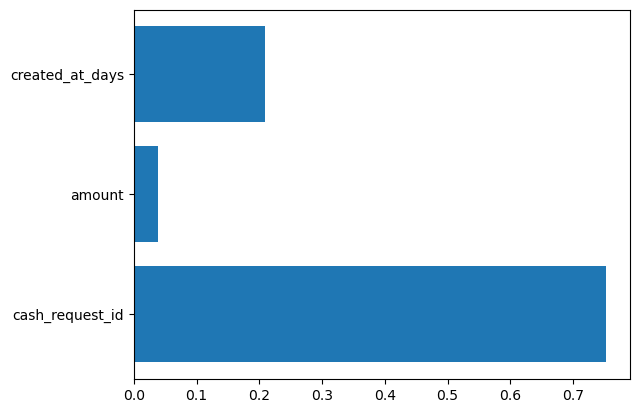

In [84]:
importances = model.feature_importances_
plt.barh(X_train.columns, importances)
plt.show()


In [86]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")


Precisión del modelo: 0.85


In [88]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


                       precision    recall  f1-score   support

               active       0.71      0.79      0.75        38
             canceled       0.00      0.00      0.00        12
direct_debit_rejected       0.71      0.75      0.73       610
    direct_debit_sent       0.75      0.86      0.80        21
           money_back       0.91      0.89      0.90      6973
             rejected       0.72      0.77      0.75      1959
 transaction_declined       0.18      0.12      0.15        16

             accuracy                           0.85      9629
            macro avg       0.57      0.60      0.58      9629
         weighted avg       0.86      0.85      0.85      9629



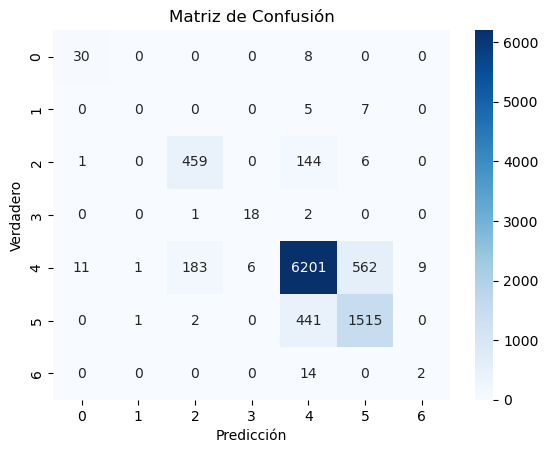

In [90]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')
plt.show()


In [92]:
import pandas as pd

feature_importances = pd.DataFrame(
    model.feature_importances_,
    index=X.columns,
    columns=["Importancia"]
).sort_values(by="Importancia", ascending=False)

print(feature_importances.head(10))  # Mostrar las 10 características más importantes


                 Importancia
cash_request_id     0.752599
created_at_x        0.208807
amount              0.038595


In [94]:
# Crear un DataFrame comparativo
predicciones_df = pd.DataFrame({
    'Verdadero': y_test,
    'Predicho': y_pred
})

# Mostrar algunas filas
print(predicciones_df.head(10))


        Verdadero    Predicho
26772  money_back  money_back
26164  money_back  money_back
24832  money_back  money_back
17779  money_back  money_back
8729     rejected    rejected
16367  money_back  money_back
14533  money_back  money_back
8943   money_back  money_back
19564  money_back  money_back
30024  money_back    rejected
